# Fashion-MNIST Using OpenAI's ChatGPT
Third in this series. Trying to improve accuracy using only the OpenAI ChatGPT.

In [1]:
# Import TensorFlow and other libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Define the class names for the Fashion-MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [3]:
# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Split the training data into training and validation sets
x_val = x_train[:5000]
y_val = y_train[:5000]
x_train = x_train[5000:]
y_train = y_train[5000:]

# Normalize the pixel values
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0


In [20]:
# Import the necessary layers and models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

# Reshape the training data to add an additional dimension for the channel
x_train = x_train.reshape((55000, 28, 28, 1))
x_val = x_val.reshape((5000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# Import the layers you need
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Add
from tensorflow.keras.models import Model

# Define the input tensor
inputs = Input(shape=(28, 28, 1))

# Define the first convolutional layer
x = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)

# Define the first pooling layer
x = MaxPooling2D((2, 2), padding='same')(x)

# Define the second convolutional layer
y = Conv2D(64, (3, 3), padding='same', activation='relu')(x)

# Define the second pooling layer
y = MaxPooling2D((1, 1), padding='same')(y)

# Add the output of the first convolutional layer to the output of the second convolutional layer
z = Add()([x, y])

# Define the third convolutional layer
z = Conv2D(128, (3, 3), activation='relu')(z)

# Define the fourth convolutional layer
z = Conv2D(128, (3, 3), activation='relu')(z)

# Define the third pooling layer
z = MaxPooling2D((2, 2))(z)

# Flatten the output of the third pooling layer
z = Flatten()(z)

# Define the dense layer
z = Dense(512, activation='relu')(z)

# Define the output layer
outputs = Dense(10, activation='softmax')(z)

# Define the model
model = Model(inputs, outputs)

# Import the RMSprop optimizer
from tensorflow.keras.optimizers import RMSprop

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10,
                    validation_data=(x_val, y_val), verbose=2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)


Epoch 1/10
430/430 - 4s - loss: 0.6709 - accuracy: 0.7545 - val_loss: 0.4709 - val_accuracy: 0.8312 - 4s/epoch - 9ms/step
Epoch 2/10
430/430 - 3s - loss: 0.4100 - accuracy: 0.8518 - val_loss: 0.4025 - val_accuracy: 0.8590 - 3s/epoch - 7ms/step
Epoch 3/10
430/430 - 3s - loss: 0.3485 - accuracy: 0.8749 - val_loss: 0.3390 - val_accuracy: 0.8814 - 3s/epoch - 7ms/step
Epoch 4/10
430/430 - 3s - loss: 0.3116 - accuracy: 0.8870 - val_loss: 0.3312 - val_accuracy: 0.8824 - 3s/epoch - 7ms/step
Epoch 5/10
430/430 - 3s - loss: 0.2841 - accuracy: 0.8974 - val_loss: 0.2921 - val_accuracy: 0.8982 - 3s/epoch - 7ms/step
Epoch 6/10
430/430 - 3s - loss: 0.2618 - accuracy: 0.9061 - val_loss: 0.2791 - val_accuracy: 0.8988 - 3s/epoch - 7ms/step
Epoch 7/10
430/430 - 3s - loss: 0.2448 - accuracy: 0.9108 - val_loss: 0.2864 - val_accuracy: 0.8898 - 3s/epoch - 7ms/step
Epoch 8/10
430/430 - 3s - loss: 0.2286 - accuracy: 0.9167 - val_loss: 0.2511 - val_accuracy: 0.9024 - 3s/epoch - 7ms/step
Epoch 9/10
430/430 - 3s 

In [21]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.2525 - accuracy: 0.9081 - 823ms/epoch - 3ms/step

Test accuracy: 0.9081000089645386


In [22]:
# Use the model to make predictions on some test images
predictions = model.predict(x_test)

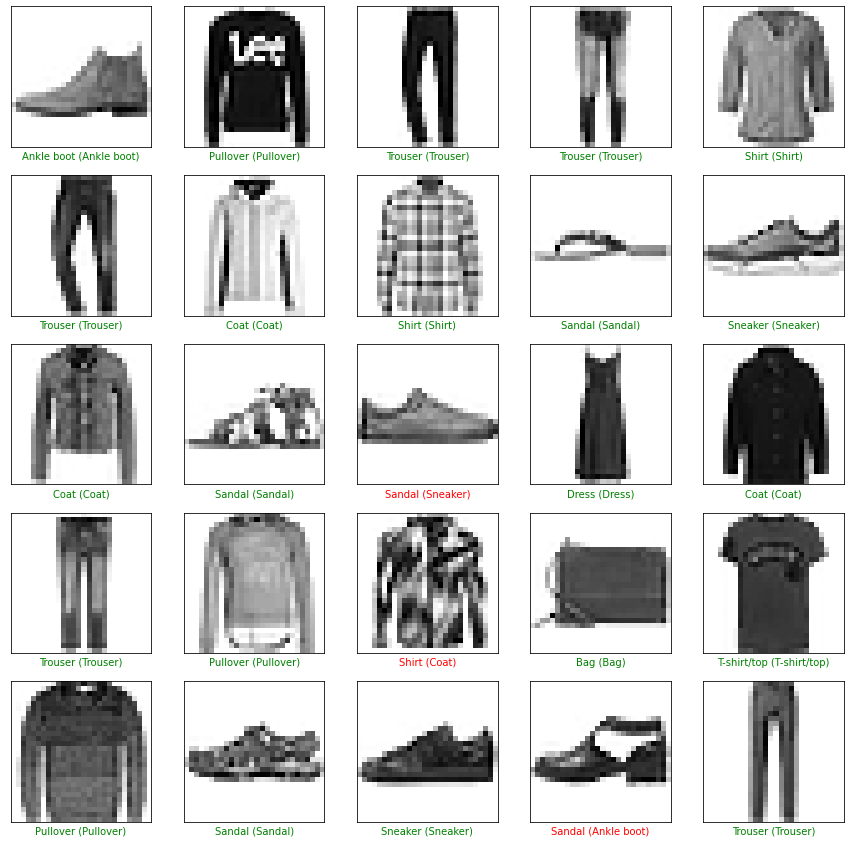

In [23]:
# Plot the first 25 test images with their predicted labels
plt.figure(figsize=(15,15))  # Set the figure size to 15 inches by 15 inches
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                  class_names[true_label]),
                                  color=color)
plt.show()


01 was 87%, 02 was 90%, and this time we got 91%.

At first it was trying to get me to use an SKLearn GridSearch. But it wasn't working. So I asked it to change gears.

It started recommending old networks that wouldn't work.

So I asked it to do a restnet in functional API.

I don't remember, maybe it took around 6 tries, but eventually it worked.

Once again, OpenAI's ChatGPT was able to improve the accuracy from last time on Fashion-MNIST.